In [118]:
import pandas as pd
import datetime
import numpy as np
import time
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor



In [119]:
train_set = pd.read_csv('AUD-USD train set.csv',parse_dates = True)
pd.options.mode.chained_assignment = None

In [120]:
#time-in : test purpose only
def time_encode(x):
    x = time.strptime(x.split(',')[0],'%H:%M:%S')
    y = datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()

    return y
train_set['Numeric time'] = train_set['time'].apply(lambda x: time_encode(x))
train_set['Numeric time' ]

0       70200.0
1       70200.0
2       30600.0
3       70200.0
4       70200.0
         ...   
1367    30600.0
1368    70200.0
1369    30600.0
1370    30600.0
1371    70200.0
Name: Numeric time, Length: 1372, dtype: float64

In [121]:
train_set['strength'][134] = np.nan

In [122]:
#replace unbehaviour values by nan
train_set['strength'][135] = np.nan
train_set['strength'][427] = np.nan
train_set['strength'][428] = np.nan
train_set['strength'][134] = np.nan
train_set

,DATE_TIME,HIGH,LOW,OPEN,CLOSE,Event_value,Event_type,Time duration,Trend,Boundaries,strength,time,Numeric time
0,2011-01-09 19:30:00,0.99716,0.99661,0.99712,0.99704,0.3,AUD_RETAILSALES,Long term,RANGE,0.000641,0.000443,19:30:00,70200.0
1,2011-01-12 19:30:00,0.99665,0.99451,0.99451,0.99586,5.0,AUD_UNEMP,Long term,DOWN,0.000149,-0.000337,19:30:00,70200.0
2,2011-01-13 8:30:00,1.00054,0.99878,1.00051,0.99919,1.1,USD_PPI,Short term,RANGE,0.000176,0.000393,8:30:00,30600.0
3,2011-01-23 19:30:00,0.98839,0.98720,0.98730,0.98721,0.1,AUD_PPI,Long term,RANGE,0.001462,0.000387,19:30:00,70200.0
4,2011-01-24 19:30:00,0.99443,0.99380,0.99386,0.99406,0.4,AUD_CPI,Short term,RANGE,0.000236,0.000649,19:30:00,70200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1367,2018-11-14 8:30:00,0.72286,0.72148,0.72168,0.72227,0.2,USD_CPI,Long term,UP,0.000223,0.000445,8:30:00,30600.0
1368,2018-11-14 19:30:00,0.72745,0.72329,0.72329,0.72675,5.0,AUD_UNEMP,Short term,RANGE,0.000223,0.000515,19:30:00,70200.0
1369,2018-11-15 8:30:00,0.72640,0.72503,0.72609,0.72571,0.8,USD_RETAIL,Short term,UP,0.000228,0.000493,8:30:00,30600.0
1370,2018-11-28 8:30:00,0.72424,0.72373,0.72387,0.72402,3.5,USD_GDP,Long term,RANGE,0.000372,0.000480,8:30:00,30600.0


In [123]:
train_set['strength']  = pd.to_numeric(train_set['strength']) # convert strength to numeric
train_set['strength']= train_set['strength'].fillna(method = 'bfill') #filling 'nan' values by using back fill method
train_set['strength'].isnull().sum() #checking null values
train_set

,DATE_TIME,HIGH,LOW,OPEN,CLOSE,Event_value,Event_type,Time duration,Trend,Boundaries,strength,time,Numeric time
0,2011-01-09 19:30:00,0.99716,0.99661,0.99712,0.99704,0.3,AUD_RETAILSALES,Long term,RANGE,0.000641,0.000443,19:30:00,70200.0
1,2011-01-12 19:30:00,0.99665,0.99451,0.99451,0.99586,5.0,AUD_UNEMP,Long term,DOWN,0.000149,-0.000337,19:30:00,70200.0
2,2011-01-13 8:30:00,1.00054,0.99878,1.00051,0.99919,1.1,USD_PPI,Short term,RANGE,0.000176,0.000393,8:30:00,30600.0
3,2011-01-23 19:30:00,0.98839,0.98720,0.98730,0.98721,0.1,AUD_PPI,Long term,RANGE,0.001462,0.000387,19:30:00,70200.0
4,2011-01-24 19:30:00,0.99443,0.99380,0.99386,0.99406,0.4,AUD_CPI,Short term,RANGE,0.000236,0.000649,19:30:00,70200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1367,2018-11-14 8:30:00,0.72286,0.72148,0.72168,0.72227,0.2,USD_CPI,Long term,UP,0.000223,0.000445,8:30:00,30600.0
1368,2018-11-14 19:30:00,0.72745,0.72329,0.72329,0.72675,5.0,AUD_UNEMP,Short term,RANGE,0.000223,0.000515,19:30:00,70200.0
1369,2018-11-15 8:30:00,0.72640,0.72503,0.72609,0.72571,0.8,USD_RETAIL,Short term,UP,0.000228,0.000493,8:30:00,30600.0
1370,2018-11-28 8:30:00,0.72424,0.72373,0.72387,0.72402,3.5,USD_GDP,Long term,RANGE,0.000372,0.000480,8:30:00,30600.0


In [124]:
train_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE_TIME      1372 non-null   object 
 1   HIGH           1372 non-null   float64
 2   LOW            1372 non-null   float64
 3   OPEN           1372 non-null   float64
 4   CLOSE          1372 non-null   float64
 5   Event_value    1372 non-null   float64
 6   Event_type     1372 non-null   object 
 7   Time duration  1372 non-null   object 
 8   Trend          1372 non-null   object 
 9   Boundaries     1372 non-null   float64
 10  strength       1372 non-null   float64
 11  time           1372 non-null   object 
 12  Numeric time   1372 non-null   float64
dtypes: float64(8), object(5)
memory usage: 139.5+ KB


In [125]:
train_set.describe() #Aggrigation behaviour of the features


,HIGH,LOW,OPEN,CLOSE,Event_value,Boundaries,strength,Numeric time
count,1372.000000,1372.00000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.853891,0.85195,0.852867,0.852960,1.395071,0.000219,0.000134,49497.376093
std,0.129209,0.12879,0.129001,0.129025,1.957019,0.000152,0.000621,20881.541316
min,0.569770,0.56492,0.568860,0.565800,-2.900000,0.000000,-0.003166,27000.000000
25%,0.745227,0.74313,0.744032,0.744120,0.200000,0.000131,-0.000441,27000.000000
50%,0.796210,0.79478,0.795420,0.795790,0.500000,0.000179,0.000442,46800.000000
75%,0.985640,0.98214,0.982300,0.985240,2.000000,0.000262,0.000515,70200.000000
max,1.105950,1.09429,1.095370,1.103940,6.400000,0.001872,0.003426,77400.000000


In [126]:
train_set.corr() #checking colleration features

,HIGH,LOW,OPEN,CLOSE,Event_value,Boundaries,strength,Numeric time
HIGH,1.000000,0.999894,0.999930,0.999958,-0.027503,0.229720,0.053963,-0.002533
LOW,0.999894,1.000000,0.999944,0.999943,-0.029938,0.226519,0.054498,-0.005909
OPEN,0.999930,0.999944,1.000000,0.999899,-0.029375,0.228163,0.053703,-0.004193
CLOSE,0.999958,0.999943,0.999899,1.000000,-0.028332,0.228337,0.054435,-0.004154
Event_value,-0.027503,-0.029938,-0.029375,-0.028332,1.000000,-0.044077,0.030674,0.316616
Boundaries,0.229720,0.226519,0.228163,0.228337,-0.044077,1.000000,0.132901,0.109134
strength,0.053963,0.054498,0.053703,0.054435,0.030674,0.132901,1.000000,0.076628
Numeric time,-0.002533,-0.005909,-0.004193,-0.004154,0.316616,0.109134,0.076628,1.000000


AxesSubplot(0.125,0.1925;0.62x0.62)


,HIGH,Event_value,Numeric time
0,0.99716,0.3,70200.0
1,0.99665,5.0,70200.0
2,1.00054,1.1,30600.0
3,0.98839,0.1,70200.0
4,0.99443,0.4,70200.0
...,...,...,...
1367,0.72286,0.2,30600.0
1368,0.72745,5.0,70200.0
1369,0.72640,0.8,30600.0
1370,0.72424,3.5,30600.0


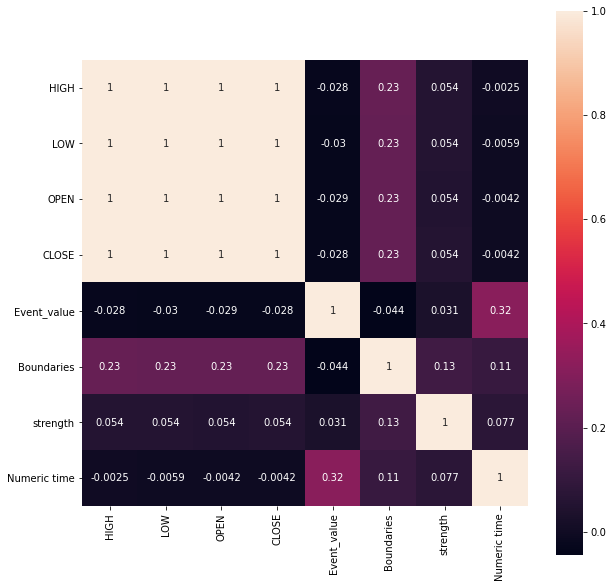

In [127]:
fig, ax = plt.subplots(figsize=(10,10))
heatmap_1 = sns.heatmap(train_set.corr(),annot=True,square =True,ax=ax)
plt.savefig("figure 2.jpg")
print(heatmap_1)
nor = train_set[['HIGH','Event_value','Numeric time']] 
nor


In [128]:
ms = MinMaxScaler().fit(nor)
scaled = ms.fit_transform(nor)
scaled = pd.DataFrame(scaled,columns = ['HIGH','Event_value','Numeric time'])
scaled 

,HIGH,Event_value,Numeric time
0,0.797102,0.344086,0.857143
1,0.796151,0.849462,0.857143
2,0.803406,0.430108,0.071429
3,0.780745,0.322581,0.857143
4,0.792010,0.354839,0.857143
...,...,...,...
1367,0.285520,0.333333,0.071429
1368,0.294080,0.849462,0.857143
1369,0.292122,0.397849,0.071429
1370,0.288094,0.688172,0.071429


Index(['AUD_CPI', 'AUD_GDP', 'AUD_PPI', 'AUD_RETAILSALES', 'AUD_UNEMP',
       'USD_CPI', 'USD_GDP', 'USD_IR', 'USD_PAYROLL', 'USD_PPI', 'USD_RETAIL'],
      dtype='object')


,HIGH,Event_value,Numeric time,AUD_CPI,AUD_GDP,AUD_PPI,AUD_RETAILSALES,AUD_UNEMP,USD_CPI,USD_GDP,USD_IR,USD_PAYROLL,USD_PPI,USD_RETAIL
0,0.797102,0.344086,0.857143,0,0,0,1,0,0,0,0,0,0,0
1,0.796151,0.849462,0.857143,0,0,0,0,1,0,0,0,0,0,0
2,0.803406,0.430108,0.071429,0,0,0,0,0,0,0,0,0,1,0
3,0.780745,0.322581,0.857143,0,0,1,0,0,0,0,0,0,0,0
4,0.792010,0.354839,0.857143,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1367,0.285520,0.333333,0.071429,0,0,0,0,0,1,0,0,0,0,0
1368,0.294080,0.849462,0.857143,0,0,0,0,1,0,0,0,0,0,0
1369,0.292122,0.397849,0.071429,0,0,0,0,0,0,0,0,0,0,1
1370,0.288094,0.688172,0.071429,0,0,0,0,0,0,1,0,0,0,0


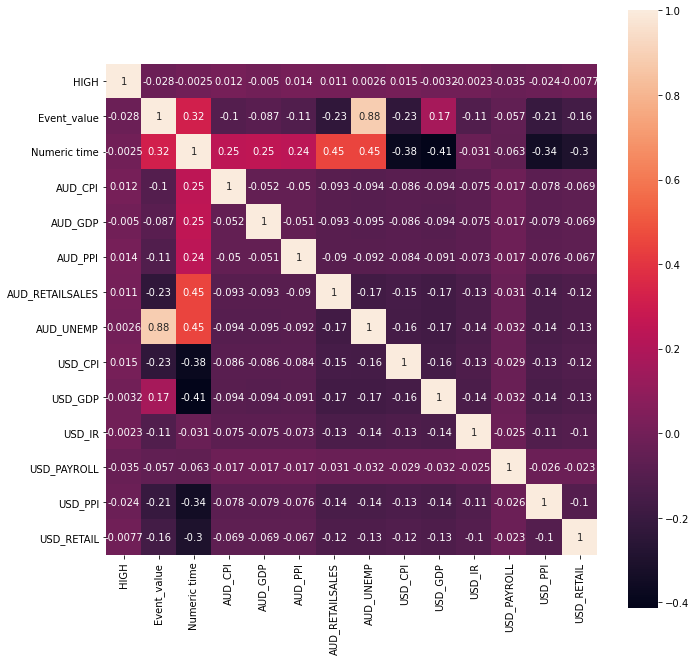

In [129]:
le = LabelEncoder()
dummies = pd.get_dummies(train_set['Event_type'])
encoding_event_order= (dummies.columns)
X = scaled.join(dummies)
y = le.fit_transform(train_set['Time duration'])

fig, ax = plt.subplots(figsize=(11,11))
hmap_2 = sns.heatmap(X.corr(),annot=True,square =True,ax=ax)
plt.savefig("figure 3.jpg")
 
print(encoding_event_order)

X


In [130]:
temp = train_set.groupby('Event_type')['strength'].mean()
temp_dict= dict(temp)
train_set['Event_type'] = train_set['Event_type'].apply(lambda x: temp_dict.get(x))
 
X_mod =  train_set[['HIGH','Event_value','Event_type','strength']]

In [131]:
#0- long 1-short
X = X.drop(columns= ['AUD_UNEMP'], axis = 1)
X
y

array([0, 0, 1, ..., 1, 0, 1])

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.20,random_state = 42) #0.20 and 90 is best

In [133]:
#predict time duration using kNN classification
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [134]:
print("Accuracy of knn model:",metrics.accuracy_score(y_test, y_pred))

Accuracy of knn model: 0.7963636363636364


In [135]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.20,random_state = 32)#32

In [136]:
#predict time duration using random Forest
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [137]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8763636363636363


In [138]:
#predict time duration using svm classification algorithm
s = svm.SVC(kernel ='poly', degree = 10)
s.fit(X_train,y_train)
y_pred = s.predict(X_test)
print("Accuracy of svm:",metrics.accuracy_score(y_test, y_pred))

Accuracy of svm: 0.730909090909091


In [139]:
y= le.fit_transform(train_set['Trend'])
y

array([1, 0, 1, ..., 2, 1, 1])

In [140]:
#predict trend using kNN classification
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Accuracy of knn:",metrics.accuracy_score(y_test, y_pred))


Accuracy of knn: 0.7818181818181819


In [141]:
#predict trend using svm classification algorithm
s = svm.SVC(kernel ='poly', degree = 15) 
s.fit(X_train,y_train)
y_pred = s.predict(X_test)
print("Accuracy of svm:",metrics.accuracy_score(y_test, y_pred))


Accuracy of svm: 0.7636363636363637


In [142]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2,random_state = 10)#splitting the train set -10
y_test_trend = y_test

#predict the trend using random Forest

clf=RandomForestClassifier(n_estimators=3)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
y_pred
print("Accuracy of random Forest:",metrics.accuracy_score(y_test, y_pred))

Accuracy of random Forest: 0.7127272727272728


In [143]:
#Experiment

In [144]:
s = svm.SVC()
s.fit(X_train,y_train)
y_pred_svm = s.predict(X_test)
print("Accuracy of svm:",metrics.accuracy_score(y_test, y_pred))

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.20,random_state = 42)
y_test_trend = y_test

#predict trend using random Forest
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred_rf=clf.predict(X_test)
print("Accuracy of random Forest:",metrics.accuracy_score(y_test, y_pred))

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
print("Accuracy of knn:",metrics.accuracy_score(y_test, y_pred))

Accuracy of svm: 0.7127272727272728
Accuracy of random Forest: 0.33090909090909093
Accuracy of knn: 0.33090909090909093


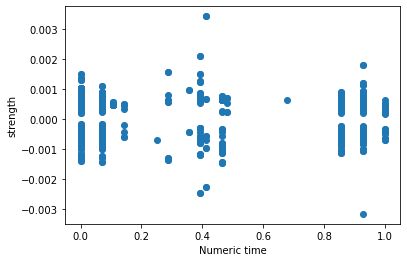

<Figure size 432x288 with 0 Axes>

In [145]:
#behaviour of event time vs. strength
y= train_set['strength']
plt.scatter(X['Numeric time'],y)
plt.xlabel('Numeric time')
plt.ylabel('strength')
plt.show()
plt.savefig("figure 4.jpg")

In [146]:
X_linear = train_set[['HIGH','Event_value','Event_type']]
X_linear['Event_type'] = le.fit_transform(X_linear['Event_type'])
X_linear.describe()


,HIGH,Event_value,Event_type
count,1372.000000,1372.000000,1372.000000
mean,0.853891,1.395071,4.415452
std,0.129209,1.957019,2.854762
min,0.569770,-2.900000,0.000000
25%,0.745227,0.200000,2.000000
50%,0.796210,0.500000,4.000000
75%,0.985640,2.000000,7.000000
max,1.105950,6.400000,10.000000


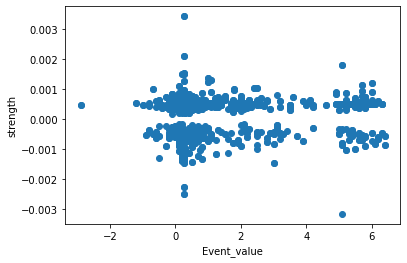

In [147]:
plt.scatter(X_linear['Event_value'],y)
plt.xlabel('Event_value')
plt.ylabel('strength')
plt.show()


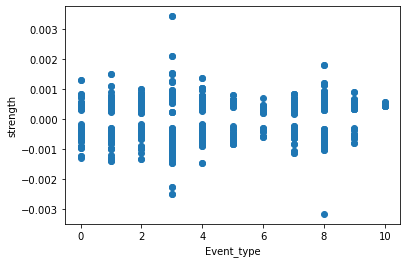

In [148]:
plt.scatter(X_linear['Event_type'],y)
plt.xlabel('Event_type')
plt.ylabel('strength')
plt.show()

In [149]:

y= train_set['strength']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2,random_state = 30)
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)
y_pred = regression_model.predict(X_test)

print('R^2:',metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
 


X

R^2: -0.035354873036727685
Mean Absolute Error: 0.0005416433344147345
Mean Squared Error: 4.345822332744935e-07
Root Mean Squared Error: 0.0006592285136995316


,HIGH,Event_value,Numeric time,AUD_CPI,AUD_GDP,AUD_PPI,AUD_RETAILSALES,USD_CPI,USD_GDP,USD_IR,USD_PAYROLL,USD_PPI,USD_RETAIL
0,0.797102,0.344086,0.857143,0,0,0,1,0,0,0,0,0,0
1,0.796151,0.849462,0.857143,0,0,0,0,0,0,0,0,0,0
2,0.803406,0.430108,0.071429,0,0,0,0,0,0,0,0,1,0
3,0.780745,0.322581,0.857143,0,0,1,0,0,0,0,0,0,0
4,0.792010,0.354839,0.857143,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1367,0.285520,0.333333,0.071429,0,0,0,0,1,0,0,0,0,0
1368,0.294080,0.849462,0.857143,0,0,0,0,0,0,0,0,0,0
1369,0.292122,0.397849,0.071429,0,0,0,0,0,0,0,0,0,1
1370,0.288094,0.688172,0.071429,0,0,0,0,0,1,0,0,0,0


In [150]:
pd.DataFrame(y_pred)

,0
0,0.000127
1,0.000216
2,-0.000056
3,0.000107
4,0.000192
...,...
270,0.000256
271,0.000068
272,0.000201
273,0.000262


In [151]:
y_test


1090   -0.000372
644    -0.000531
1315    0.000478
446    -0.000285
128     0.000387
          ...   
785    -0.002255
390     0.000494
742    -0.000372
131    -0.000962
12      0.000637
Name: strength, Length: 275, dtype: float64

# Linear regression method 2

In [152]:

X = X_mod.drop(columns= 'strength')
y = X_mod['strength']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.10,random_state = 20)#0.12 20


regression_model.fit(X_train,y_train)
y_pred = regression_model.predict(X_test)

print('R^2:',metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
 
X


R^2: -0.01788438019975236
Mean Absolute Error: 0.0005037735382498389
Mean Squared Error: 3.2031488946094034e-07
Root Mean Squared Error: 0.0005659636821041967


,HIGH,Event_value,Event_type
0,0.99716,0.3,0.000197
1,0.99665,5.0,0.000198
2,1.00054,1.1,0.000084
3,0.98839,0.1,0.000184
4,0.99443,0.4,0.000125
...,...,...,...
1367,0.72286,0.2,0.000072
1368,0.72745,5.0,0.000198
1369,0.72640,0.8,0.000052
1370,0.72424,3.5,0.000110


In [153]:
const = regression_model.intercept_
print('constant value :',const)
coef = regression_model.coef_
print('coefficient of indipendent variables :',coef)

constant value : -0.00020575875285760536
coefficient of indipendent variables : [ 2.11973071e-04 -3.01345183e-06  1.17963337e+00]


In [154]:

 #find the strength value when an event increased
def increasing_strength(HIGH,event_value,event_type,p): #p= increasing_percentage
    init_strength = coef[0]*HIGH+ coef[1]*event_value + coef[2]*event_type + const
    increased_strength = coef[0]*HIGH + coef[1]*(event_value + event_value*p) + coef[2]*event_type + const
    return increased_strength
    

In [155]:
print(pd.Series(temp_dict))


AUD_CPI            0.000125
AUD_GDP            0.000258
AUD_PPI            0.000184
AUD_RETAILSALES    0.000197
AUD_UNEMP          0.000198
USD_CPI            0.000072
USD_GDP            0.000110
USD_IR             0.000087
USD_PAYROLL        0.000481
USD_PPI            0.000084
USD_RETAIL         0.000052
dtype: float64


In [156]:
trend_pred = []
for i in range(275):
    if y_pred_knn[i] ==y_test_trend[i] or y_pred_rf[i] ==y_test_trend[i] or y_pred_svm[i] ==y_test_trend[i]:
        trend_pred.append(y_test_trend[i])
    else:
        trend_pred.append(y_pred_svm[i])

print("Accuracy of the combining model:",metrics.accuracy_score(y_test_trend, trend_pred))
    

Accuracy of the combining model: 0.9272727272727272
